ANÁLISIS DE ATAQUES COMÚNES A REDES DE TELECOMUNICACIONES
Objetivo: Determinar heramientas de mitigación de ataques comúnes

Paso 1: Implimentación de librerías necesarias

In [53]:
# Importación de librerías necesarias para el análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

Paso 2: Lectura e impresión de los datos del archivo

In [12]:
df = pd.read_csv("cybersecurity_attacks.csv")
print(len(df))
df.info()

40000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 no

Paso 3: Revisión de valores a través de un histograma para determinar las columnas importantes de nuestro análisis

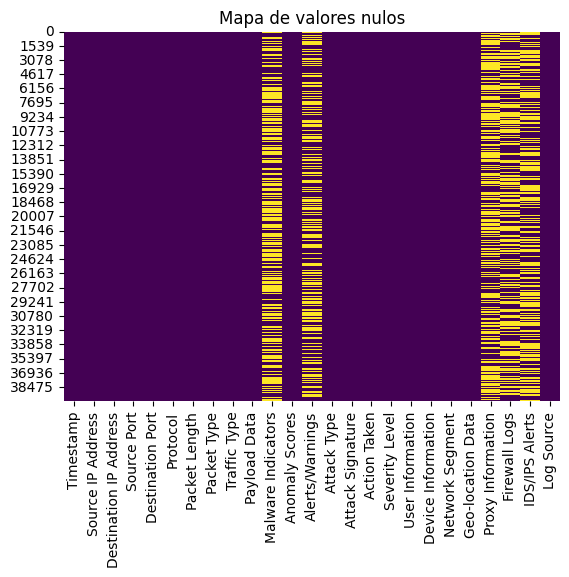

In [13]:
# Ver valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores nulos")
plt.show()

Paso 4: Nuestro análisis se va a enfocar en datos válidos por ende borraremos las columnas con datos nulos y datos basura como las ip de destino y fuente; datos no relevantes en nuestro análisis.

In [42]:
df_principal = df.drop(columns=["Malware Indicators", "Alerts/Warnings", "Proxy Information","Firewall Logs",
                                "IDS/IPS Alerts","Source IP Address" ,"Destination IP Address", "Packet Length",
                                "Payload Data","Anomaly Scores","Attack Signature","User Information","Network Segment",
                                "Action Taken","Device Information","Geo-location Data","Log Source"
                            ])       
df_principal

,Timestamp,Source Port,Destination Port,Protocol,Packet Type,Traffic Type,Attack Type,Severity Level
0,2023-05-30 06:33:58,31225,17616,ICMP,Data,HTTP,Malware,Low
1,2020-08-26 07:08:30,17245,48166,ICMP,Data,HTTP,Malware,Low
2,2022-11-13 08:23:25,16811,53600,UDP,Control,HTTP,DDoS,Low
3,2023-07-02 10:38:46,20018,32534,UDP,Data,HTTP,Malware,Medium
4,2023-07-16 13:11:07,6131,26646,TCP,Data,DNS,DDoS,Low
...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,31005,6764,UDP,Control,HTTP,DDoS,Medium
39996,2023-03-27 00:38:27,2553,28091,UDP,Control,HTTP,DDoS,High
39997,2022-03-31 01:45:49,22505,25152,UDP,Data,DNS,DDoS,Low
39998,2023-09-22 18:32:38,20013,2703,UDP,Data,FTP,Malware,Low


Paso 5: Vamos a relacionar mediante un gráfico 3D las columnas del Tipo Protocolo, Tipo de Tráfico y Tipo de Ataque

['ICMP' 'UDP' 'TCP']
[0 1 2]
['HTTP' 'DNS' 'FTP']
[0 1 2]
['Malware' 'DDoS' 'Intrusion']
[0 1 2]


Text(0.5, 0, 'Tipo de Ataque')

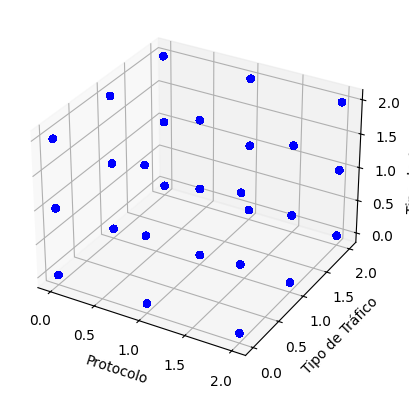

In [54]:
# Convertir los string a números para poder graficar
protocol_num = pd.factorize(df['Protocol'])[0]
print(df['Protocol'].unique())
print(np.unique(protocol_num))
traffic_type_num = pd.factorize(df['Traffic Type'])[0]
print(df['Traffic Type'].unique())
print(np.unique(traffic_type_num))
attack_type_num = pd.factorize(df['Attack Type'])[0]
print(df['Attack Type'].unique())
print(np.unique(attack_type_num))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Graficar puntos 3D
ax.scatter(protocol_num, traffic_type_num, attack_type_num, c='blue', marker='o')
# Etiquetas
ax.set_xlabel('Protocolo')
ax.set_ylabel('Tipo de Tráfico')
ax.set_zlabel('Tipo de Ataque')

Paso 6: Análisis de los puertos de destino y los atauqes que reciben

C:\Users\DETPC\AppData\Local\Temp\ipykernel_44948\3748541024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


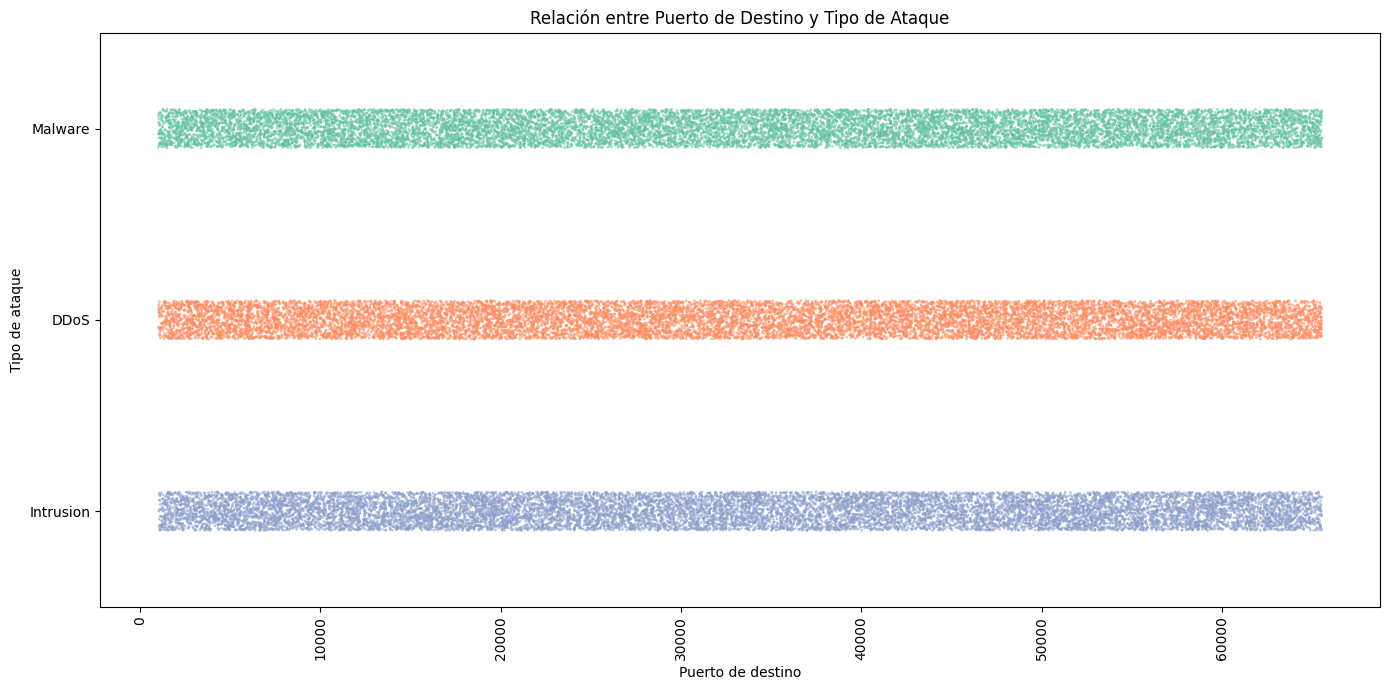

In [56]:
# ✅ Stripplot: Puerto vs Tipo de ataque
plt.figure(figsize=(14, 7))
sns.stripplot(
    data=df,
    x='Destination Port',
    y='Attack Type',
    jitter=True,
    alpha=0.6,
    palette='Set2',
    size=2
)
plt.title("Relación entre Puerto de Destino y Tipo de Ataque")
plt.xlabel("Puerto de destino")
plt.ylabel("Tipo de ataque")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Paso 7: Filtrar puertos más atacados y tipos de ataque más frecuentes

In [57]:
top_ports = df['Destination Port'].value_counts().head(15).index.tolist()
top_attacks = df['Attack Type'].value_counts().head(5).index.tolist()

df_filtered = df[
    (df['Destination Port'].isin(top_ports)) &
    (df['Attack Type'].isin(top_attacks))
]

# Paso 11: Crear tabla de frecuencias
pivot = df_filtered.pivot_table(
    index='Attack Type',
    columns='Destination Port',
    aggfunc='size',
    fill_value=0
)

 Paso 8: Crear tabla de frecuencias

In [58]:
pivot = df_filtered.pivot_table(
    index='Attack Type',
    columns='Destination Port',
    aggfunc='size',
    fill_value=0
)

# Filtrar columnas con al menos 5 ocurrencias
pivot_filtrado = pivot.loc[:, pivot.sum(axis=0) >= 5]


 Paso 9: Mostrar heatmap si hay datos suficientes

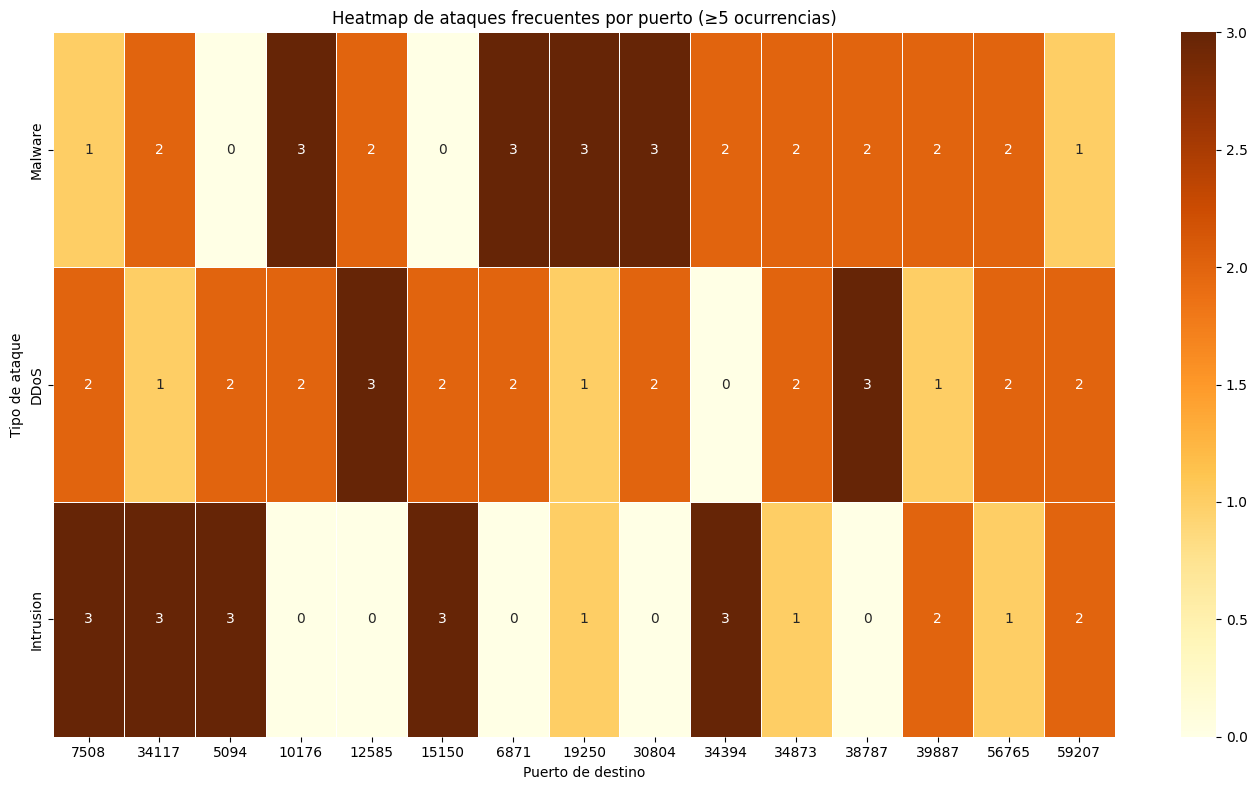

In [59]:
if not pivot_filtrado.empty:
    pivot_filtrado = pivot_filtrado.loc[
        pivot_filtrado.sum(axis=1).sort_values(ascending=False).index,
        pivot_filtrado.sum(axis=0).sort_values(ascending=False).index
    ]
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_filtrado, cmap='YlOrBr', linewidths=0.5, annot=True, fmt='d')
    plt.title("Heatmap de ataques frecuentes por puerto (≥5 ocurrencias)")
    plt.xlabel("Puerto de destino")
    plt.ylabel("Tipo de ataque")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No hay suficientes datos para generar el heatmap filtrado.")

Paso 10: Exportar resumen corregido

In [60]:
pivot_filtrado.to_csv("resumen_top_ports.csv")
print("✅ Archivo exportado: resumen_top_ports.csv")

✅ Archivo exportado: resumen_top_ports.csv
